## Seminar II: Numpy
October 14, 2025
_______________________

In [1]:
# install requirements if needed

# !pip install numpy matplotlib pandas kaggle

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1 — Simulate a 1D array of simulated daily temperatures
* Use normal distribution with `mean = 15` and `sd = 25`
* Simulate 28 days of daily temperatures
* Save as temps object
* Convert the from Celsius to Fahrenheit and save as temps_fahrenheit
$$fahrenheit = 1.8 * celsius + 32$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(523)
temps = np.random.normal(15, 5, 28)
print(temps)

[19.5246261  13.87984607 17.9771652  15.06991892 12.23011613 12.10877908
 16.02151868  5.0398685  23.03751401 24.27543455 19.28846398 10.92180551
 10.50722355 17.11085615 15.69301971 13.87028797 31.91920167 18.28088347
  5.61428329 13.3279417  20.38896978 17.22200775 27.93801821 13.04932323
 26.15438308 14.93714829  4.29841925 16.83368234]


In [5]:
temps_fahrenheit = 9 * temps / 5 + 32
print(temps_fahrenheit)

[67.14432698 56.98372292 64.35889736 59.12585406 54.01420904 53.79580234
 60.83873362 41.07176331 73.46752521 75.6957822  66.71923517 51.65924991
 50.9130024  62.79954108 60.24743547 56.96651835 89.45456301 64.90559024
 42.10570993 55.99029506 68.70014561 62.99961395 82.28843278 55.48878181
 79.07788955 58.88686692 39.73715465 62.30062821]


#### Print shape and dtype of temps

In [6]:
print(temps.shape, temps.dtype)

(28,) float64


#### Reshape temps so that it consists of 4 rows (weeks) and 7 columns (days of week)

In [7]:
temps = temps.reshape((4, 7))
print(temps)

[[19.5246261  13.87984607 17.9771652  15.06991892 12.23011613 12.10877908
  16.02151868]
 [ 5.0398685  23.03751401 24.27543455 19.28846398 10.92180551 10.50722355
  17.11085615]
 [15.69301971 13.87028797 31.91920167 18.28088347  5.61428329 13.3279417
  20.38896978]
 [17.22200775 27.93801821 13.04932323 26.15438308 14.93714829  4.29841925
  16.83368234]]


####  Use slicing to display
* all Wednesday values (assume week starting on Monday) 
* Week #2
* 1st and 3rd week

* verify that all temperatures are higher than 5 degrees Celsius
* verify that all temperatures are lower than 30 degrees Celsius

In [8]:
temps[:, 2]
temps[0]
temps[::2]

array([[19.5246261 , 13.87984607, 17.9771652 , 15.06991892, 12.23011613,
        12.10877908, 16.02151868],
       [15.69301971, 13.87028797, 31.91920167, 18.28088347,  5.61428329,
        13.3279417 , 20.38896978]])

In [9]:
(temps < 30).all()
(temps > 5).all()

np.False_

#### Print mean temperatures 
* Overall in Celsius and Fahrenheit
* For each day in Celsius
* For each week in Celsius

In [10]:
print(temps.mean(), temps_fahrenheit.mean())

16.304310935408548 61.34775968373538


In [11]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in range(7):
    print(f'Mean temperature for {weekdays[i]}s is {temps.mean(axis = 0)[i]: .2f} degrees Celsius')

Mean temperature for Mondays is  14.37 degrees Celsius
Mean temperature for Tuesdays is  19.68 degrees Celsius
Mean temperature for Wednesdays is  21.81 degrees Celsius
Mean temperature for Thursdays is  19.70 degrees Celsius
Mean temperature for Fridays is  10.93 degrees Celsius
Mean temperature for Saturdays is  10.06 degrees Celsius
Mean temperature for Sundays is  17.59 degrees Celsius


In [12]:
for i in range(4):
    print(f'Mean temperature for week {i+1} is {temps.mean(axis = 1)[i]: .2f} degrees Celsius')

Mean temperature for week 1 is  15.26 degrees Celsius
Mean temperature for week 2 is  15.74 degrees Celsius
Mean temperature for week 3 is  17.01 degrees Celsius
Mean temperature for week 4 is  17.20 degrees Celsius


#### Plot both temperature series into 1 plot

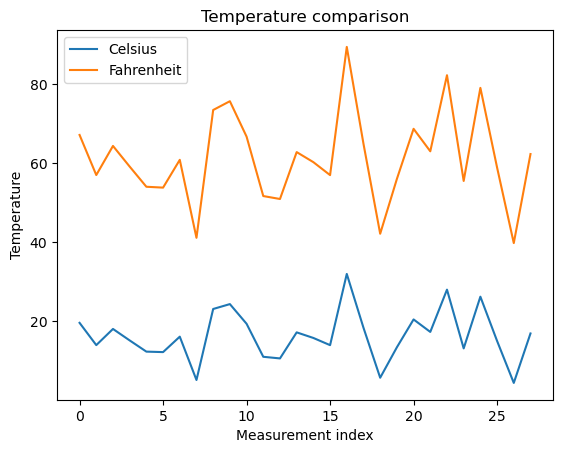

In [13]:
plt.plot(temps.flatten(), label="Celsius")
plt.plot(temps_fahrenheit, label="Fahrenheit")
plt.title("Temperature comparison")
plt.xlabel("Measurement index")
plt.ylabel("Temperature")
plt.legend()
plt.show()

### Exercise 2 - Simulate 2D array of artificial stock returns
* Simulate 1 year of data (252 observations) and 5 stocks
* Simulate from normal distribution with the defined means and standard deviations
* Compute sample mean and standard deviation for each of the assets

In [26]:
np.random.seed(523)
means = np.array([0, -0.01, 0, 0.005, .012])
sds   = np.array([0.01, 0.01, 0.01, 0.01, 0.01])

returns = np.random.normal(means, sds, size=(252,5))

In [15]:
for i in range(returns.shape[1]):
    print(f'Stock {i+1} has a mean of {returns.mean(axis = 0)[i]: .5f}.')

Stock 1 has a mean of  0.00001.
Stock 2 has a mean of -0.00078.
Stock 3 has a mean of -0.00083.
Stock 4 has a mean of -0.00089.
Stock 5 has a mean of  0.00073.


In [16]:
for i in range(returns.shape[1]):
    print(f'Stock {i+1} has a standard deviation {returns.std(axis = 0)[i]: .2f}.')

Stock 1 has a standard deviation  0.01.
Stock 2 has a standard deviation  0.01.
Stock 3 has a standard deviation  0.01.
Stock 4 has a standard deviation  0.01.
Stock 5 has a standard deviation  0.01.


#### Compute the correlation for each of the asset pairs

In [17]:
corr = np.corrcoef(returns.T)
print(corr)

[[ 1.         -0.00201668  0.0158186   0.03593054 -0.02432926]
 [-0.00201668  1.          0.0180514   0.04057639  0.07921811]
 [ 0.0158186   0.0180514   1.          0.02313868  0.00685065]
 [ 0.03593054  0.04057639  0.02313868  1.          0.07810795]
 [-0.02432926  0.07921811  0.00685065  0.07810795  1.        ]]


#### Extract
* returns of the 2nd asset for Wednesdays (assume each week has 5 days and the sample starts Monday)
* all returns of stocks 1 and 4

In [18]:
returns[2::5][:,1]

array([-0.00815639, -0.00438407,  0.00074131,  0.01713111, -0.00108715,
       -0.01299516, -0.0131075 ,  0.00082537,  0.00128091,  0.01055551,
       -0.00731542, -0.00203778, -0.00046194, -0.01350496, -0.00285564,
       -0.01510404, -0.00993538, -0.00446229,  0.01118802, -0.00924858,
        0.00048441,  0.01685302,  0.0051262 , -0.00870615,  0.02174323,
       -0.00239364,  0.00232216,  0.00993002, -0.00295177,  0.0285466 ,
       -0.00123234, -0.00198329, -0.00853344, -0.02096027, -0.01016566,
        0.0105302 , -0.02824507,  0.0064995 , -0.00040231, -0.00053119,
       -0.00864944,  0.01544555, -0.00106014,  0.00084062,  0.00827517,
       -0.01915671,  0.00811575,  0.00340541,  0.01860405,  0.01148598])

In [19]:
returns[:, [0, 3]]

array([[ 9.04925220e-03,  1.39837842e-04],
       [-5.78244184e-03,  1.60750280e-02],
       [ 8.57692796e-03,  4.22171231e-03],
       [-2.25942405e-03, -1.87714334e-02],
       [ 1.07779396e-02, -3.90135355e-03],
       [-1.25703426e-04, -1.17716554e-02],
       [-7.38950509e-03,  6.55757004e-03],
       [ 1.35491851e-02, -1.83001844e-02],
       [-2.04168939e-02, -1.11221619e-02],
       [ 1.23200460e-03, -5.66162142e-03],
       [-1.50487634e-02, -1.82281834e-02],
       [ 1.20158176e-02, -7.28526876e-04],
       [ 5.75191012e-04,  8.76697016e-04],
       [-9.67694951e-04, -2.81550198e-03],
       [-1.24320900e-02,  8.57716131e-03],
       [-1.02305306e-02, -9.63252367e-04],
       [ 4.17627877e-03,  2.33076320e-02],
       [ 1.63511518e-02,  2.10401710e-04],
       [ 1.71477752e-02, -1.52622460e-03],
       [ 2.94107165e-03,  1.52071136e-02],
       [-7.56006674e-03, -1.06758882e-02],
       [-3.31637677e-03,  1.17293947e-02],
       [ 2.99400820e-04, -1.49728496e-02],
       [-1.

#### Identify days where average return across assets is greater than 0

In [20]:
positive_avg_days = returns.mean(axis=1) > 0
print(f'There are {positive_avg_days.sum()} days with positive average returns.')

There are 112 days with positive average returns.


#### Plot the returns
* Compute cumulative returns for each of the assets
* Plot the time series of returns into 1 plot

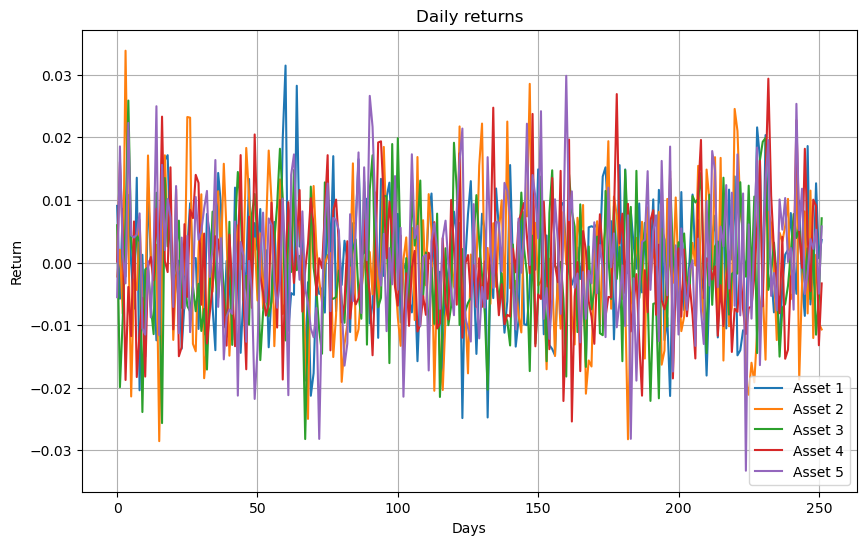

In [23]:
# Plot returns
plt.figure(figsize=(10,6))
plt.plot(returns)
plt.title("Daily returns")
plt.xlabel("Days")
plt.ylabel("Return")
plt.legend([f"Asset {i+1}" for i in range(returns.shape[1])])
plt.grid(True)
plt.show()

In [28]:
cum_returns = np.cumprod(1 + returns, axis=0)

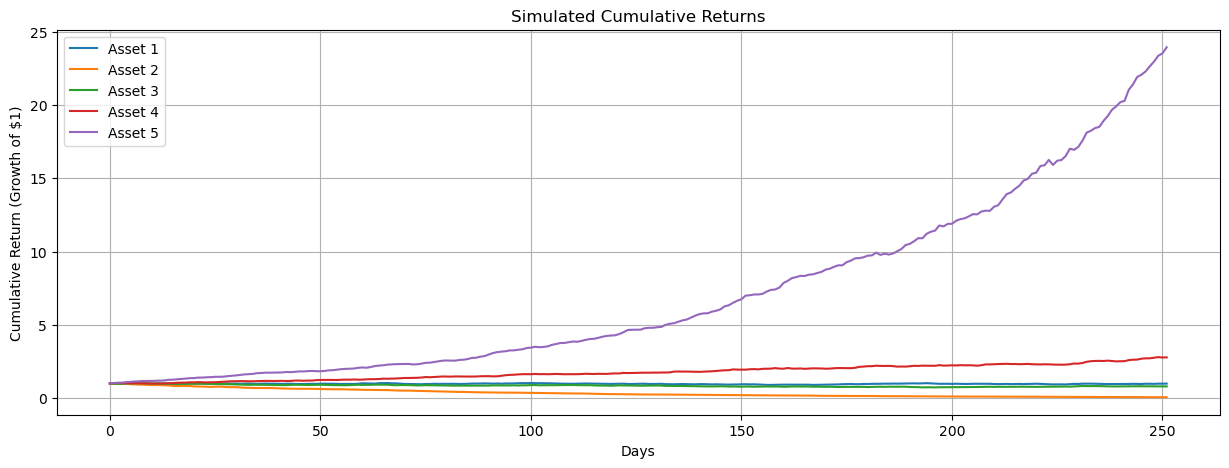

In [30]:
# Plot as time series
plt.figure(figsize=(15,5))
plt.plot(cum_returns)
plt.title("Simulated Cumulative Returns")
plt.xlabel("Days")
plt.ylabel("Cumulative Return (Growth of $1)")
plt.legend([f"Asset {i+1}" for i in range(cum_returns.shape[1])])
plt.grid(True)
plt.show()

#### Plot histogram of returns for asset 2

In [ ]:
plt.figure(figsize=(6,6))
plt.hist(returns[:,1])
plt.title("Histogram of asset 2 returns")

In [ ]:
import seaborn as sns

sns.histplot(returns[:,1], kde=True)

---
### Exercise 3 — 3D array (image)

First we will load the image into a 3D array

In [ ]:
img = plt.imread("03_pics/mc_escher_print gallery.png")
plt.imshow(img, interpolation="nearest", aspect="auto")
plt.axis('off')

* Verify that all values are lower or equal than 1
* Find the range of realized values

In [ ]:
(img<=1).all()

In [ ]:
print(f'The values range from {img.min()} to {img.max()}')

#### Remove each of the primary colors
* Create a copy of img and save it as img2
* Set all the values for `Red` to 0 and display the image
* Set all the values for `Green` to 0 and display the image
* Set all the values for `Blue` to 0 and display the image

In [ ]:
# remove red
img2 = img.copy()

img2[:,:,0] = 0
plt.imshow(img2, interpolation="nearest", aspect="auto")
plt.axis('off')


In [ ]:
# remove green
img2 = img.copy()

img2[:,:,1] = 0
plt.imshow(img2, interpolation="nearest", aspect="auto")
plt.axis('off')

In [ ]:
# remove blue
img2 = img.copy()

img2[:,:,2] = 0

plt.imshow(img2, interpolation="nearest", aspect="auto")
plt.axis('off')

#### Invert the grayscale of the image
* What was white should be black, etc.

In [ ]:
inverted_img = img.copy()

inverted_img[:,:,0:3] = 1 - inverted_img[:,:,0:3]

plt.imshow(inverted_img, interpolation="nearest", aspect="auto")
plt.title('Inverted image')
plt.axis('off')

#### Add Gaussian noise to the picture
* Create an np.array from normal distribution with `mean = 0` and `sd = 0.1` of shape (1024, 1280, 3), and add it to the RGB colors
* employ clipping of the values to the interval `[0, 1]`

In [ ]:
noisy = img.copy()

noise = np.random.normal(0, 0.01, size=img[..., :3].shape)  # mean 0, std 0.05
noisy[..., :3] = np.clip(noisy[..., :3] + noise, 0, 1)

plt.imshow(noisy, interpolation="nearest", aspect="auto")
plt.title('Added Gaussian noise')
plt.axis('off')


In [ ]:
print(img[:,:,0].mean(), noisy[:,:,0].mean())

#### Flip the image horizontally

* You can use np.flip()
* Keep the `A` values

In [ ]:
flipped_img = img.copy()
flipped_img = np.flip(flipped_img[..., 0:3])

plt.imshow(flipped_img, interpolation="nearest", aspect="auto")
plt.title('Added Gaussian noise')
plt.axis('off')

In [ ]:
flipped_img = img.copy()
flipped_img = np.flip(flipped_img[..., 0:3])

alpha_channel = np.ones((*flipped_img.shape[:2], 1), dtype=flipped_img.dtype)
flipped_rgba = np.concatenate((flipped_img, alpha_channel), axis=2)

plt.imshow(flipped_rgba)
plt.title("Flipped Image")
plt.axis("off")
plt.show()

#### Flatten the image and then reconstruct it

In [ ]:
flattened_img = img.flatten()
flattened_img.shape

In [ ]:
reconstructed_img = flattened_img.reshape(img.shape)

plt.imshow(reconstructed_img)
plt.title("Reconstructed Image")
plt.axis("off")
plt.show()

#### Bonus: create a checkerboard mask to selectively white every other 8×8 block.

In [ ]:
h, w, _ = img.shape
block = 8 

# Compute how many 8×8 blocks fit in each dimension
h_blocks = h // block
w_blocks = w // block

# Create a checkerboard pattern using addition mod 2
checker = (np.add.outer(np.arange(h_blocks), np.arange(w_blocks)) % 2).astype(bool)
mask = np.kron(checker, np.ones((block, block), dtype=bool))

# Apply mask: zero every other block
checker_img = img.copy()
checker_img[~mask] = 1  # zero RGBA pixels in the masked-out blocks

plt.imshow(checker_img)
plt.title("Checkerboard Mask (8×8 Blocks)")
plt.axis("off")
plt.show()